In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import seaborn as sns
import numpy as np
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ../

/Users/edwardrees/git/side-projects/jax-rl


In [4]:
from src.utils import parse_experiments

In [130]:
def plot_rewards(exp, stage, wsz=1):
    df, trs = parse_experiments(exp, stage)
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    
    # smooth results
    dfp, df = smooth(df, wsz)
    [ax.set_title(stage) for ax in axs]
    sns.lineplot(x='Episode', y='Reward', data=df, ax=axs[0]);
    dfp.plot(ax=axs[1]);
    
def plot_comparison(exps, stage, wsz=1):
    fig, axs = plt.subplots(figsize=(12,8))
    axs.set_title(stage)
    for exp in exps:
        algo = exp.split('/')[2]
        df, trs = parse_experiments(exp, stage)
        dfp, df = smooth(df, wsz)
        sns.lineplot(x='Episode', y='Reward', data=df, ax=axs, label=algo)

In [131]:
def smooth(df, wsz):
    dfp = df.pivot(index='Episode', columns='run', values='Reward')
    dfp = dfp.rolling(wsz).mean()
    df = dfp.melt(ignore_index=False).rename(columns={"value": "Reward"})
    return dfp, df

## Comparison

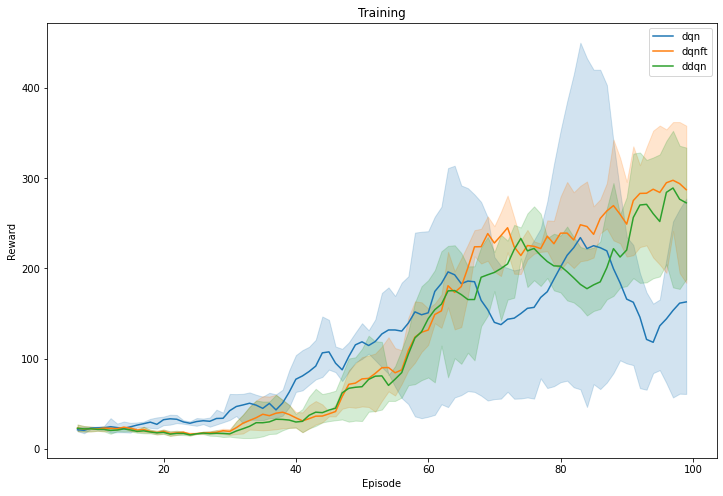

In [132]:
exps = [
    'out/CartPole-v1/dqn/EPS100-LR0.01-DF0.99',
    'out/CartPole-v1/dqnft/EPS100-LR0.01-DF0.99',
    'out/CartPole-v1/ddqn/EPS100-LR0.01-DF0.99'
]

df = plot_comparison(exps, 'Training', 7)

### DQN Results

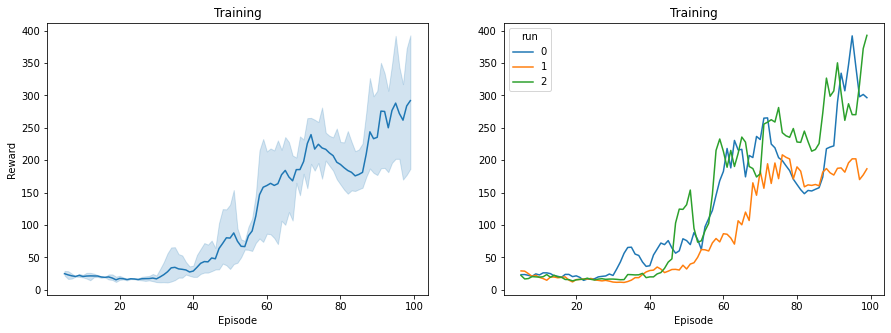

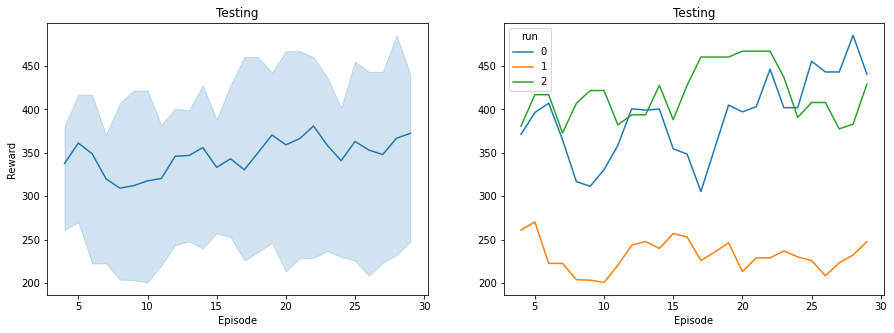

In [137]:
algo = 'ddqn'
exp = f'out/CartPole-v1/{algo}/EPS100-LR0.01-DF0.99'
plot_rewards(exp, 'Training', 5)
plot_rewards(exp, 'Testing', 5)

^Reinforcement learning is very unstable! The only difference in the above is the random seed, one agent solved the environment wheras another completley failed!